In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv("train.csv")

# Show first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.info()

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Age'].isnull().sum()  # should be 0

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'].isnull().sum()  # should be 0

df.drop('Cabin', axis=1, inplace=True)

df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # clean style

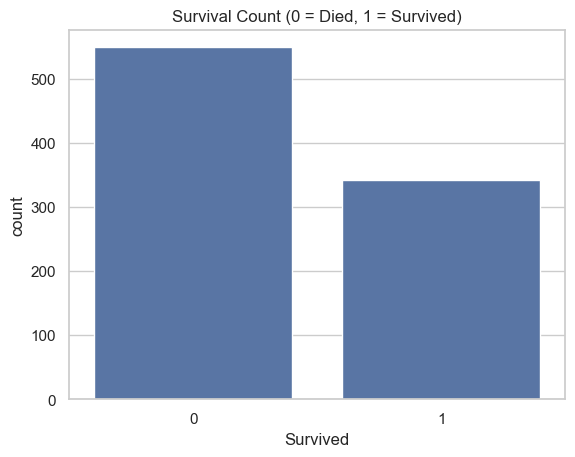

In [21]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

### There were significantly more people who didn’t survive (0) compared to those who did (1) ###

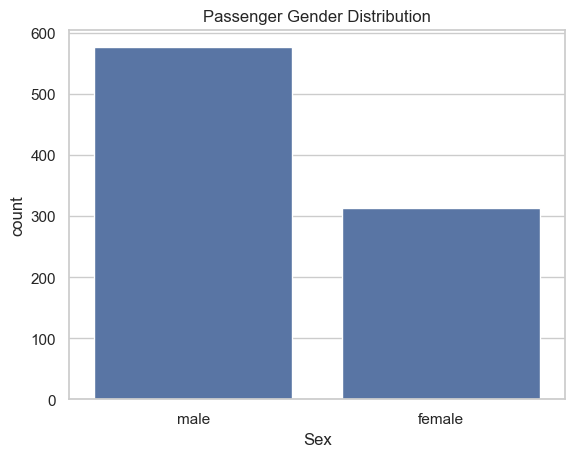

In [22]:
sns.countplot(data=df, x='Sex')
plt.title('Passenger Gender Distribution')
plt.show()

### The Titanic had more male passengers than female ###

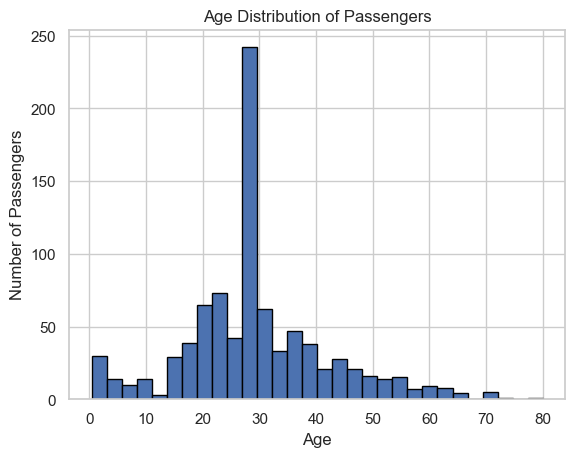

In [23]:
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

### Most passengers were between the ages of 20 and 40. Very few were children or elderly ###

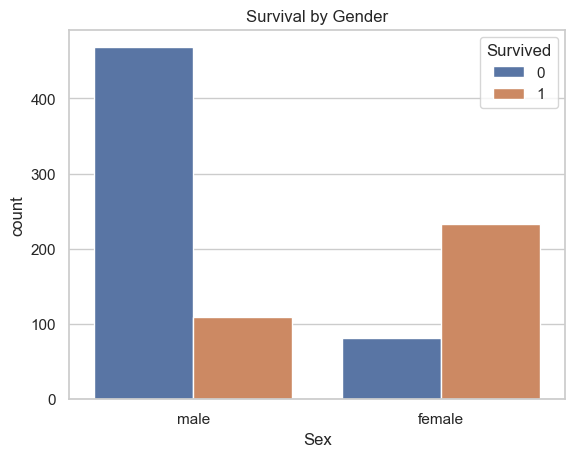

In [17]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

### A much higher percentage of females survived compared to males — consistent with the "women and children first" evacuation policy.



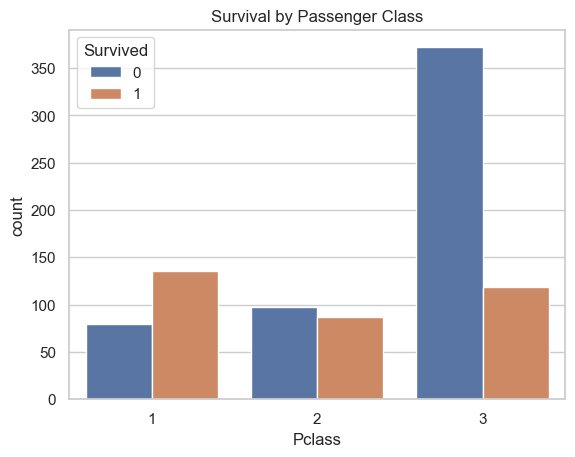

In [24]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

### Passengers in 1st class had the highest survival rate, while 3rd class passengers had the lowest.

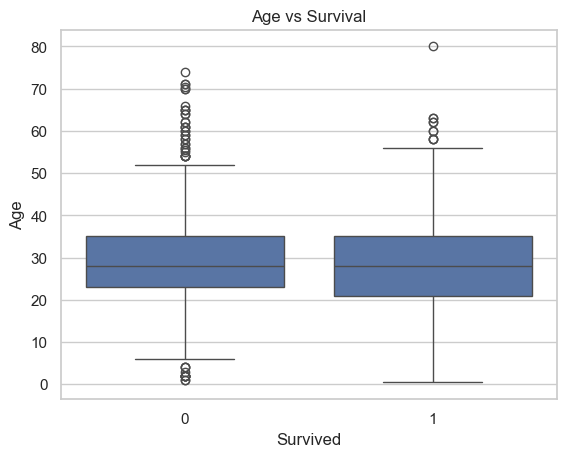

In [25]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age vs Survival')
plt.show()


### Younger passengers (including children) had slightly better survival odds. The age range of survivors was broad.

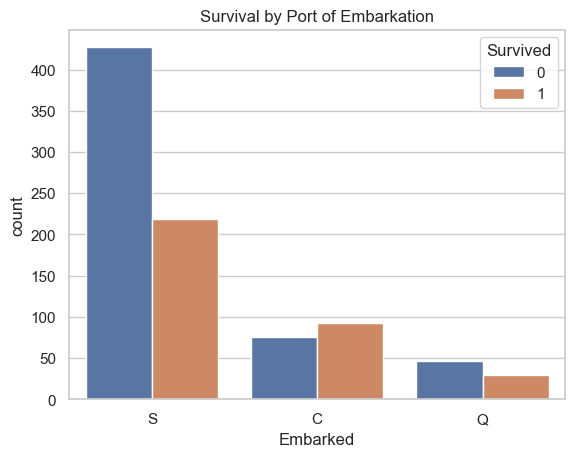

In [25]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival by Port of Embarkation')
plt.show()

### Passengers who boarded from Cherbourg (C) had a higher survival rate than those from Queenstown (Q) or Southampton (S).



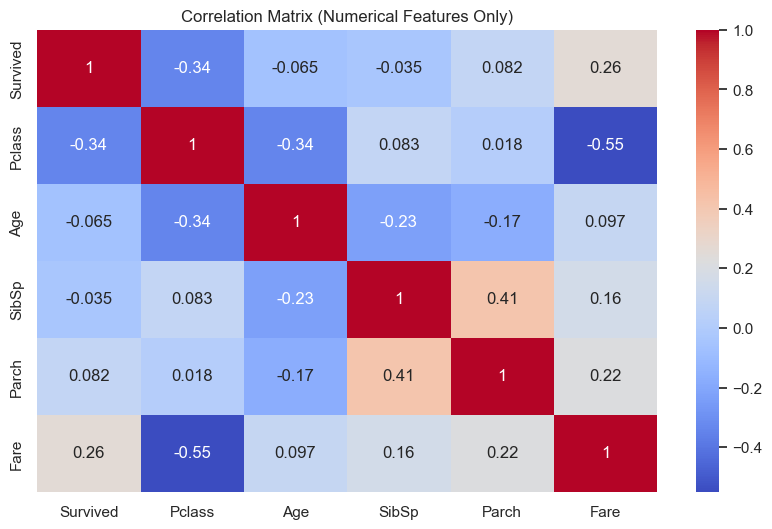

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()

### Fare and Pclass are somewhat correlated with survival. Age has a low correlation, and SibSp/Parch have slight influence.